<a href="https://colab.research.google.com/github/awaiskhan005/DATA-SCIENCE-AND-AI-/blob/main/CNN_model_on_MNIST_IMAGE_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import matplotlib as mpl


In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Data reshape

In [6]:
X_train_full = X_train_full.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

DATA NORMALIZATION


In [7]:
X_train_n = X_train_full / 255.0
X_test_n = X_test / 255.

In [8]:
x_valid, x_train = X_train_n[:5000], X_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n

In [9]:
np.random.seed(42)
tf.random.set_seed(42)

ARCHAETICTURE

In [13]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding="valid", activation="relu", input_shape=[28, 28, 1]))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 300)               1622700   
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                      

In [15]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [16]:
model_history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 56s 32ms/step - loss: 0.7232 - accuracy: 0.7426 - val_loss: 0.5560 - val_accuracy: 0.7994
Epoch 2/10
1719/1719 [==============================] - 48s 28ms/step - loss: 0.4839 - accuracy: 0.8239 - val_loss: 0.4127 - val_accuracy: 0.8594
Epoch 3/10
1719/1719 [==============================] - 51s 29ms/step - loss: 0.4248 - accuracy: 0.8466 - val_loss: 0.6193 - val_accuracy: 0.7568
Epoch 4/10
1719/1719 [==============================] - 52s 30ms/step - loss: 0.3883 - accuracy: 0.8602 - val_loss: 0.3557 - val_accuracy: 0.8768
Epoch 5/10
1719/1719 [==============================] - 49s 28ms/step - loss: 0.3599 - accuracy: 0.8689 - val_loss: 0.3441 - val_accuracy: 0.8790
Epoch 6/10
1719/1719 [==============================] - 49s 29ms/step - loss: 0.3350 - accuracy: 0.8782 - val_loss: 0.3294 - val_accuracy: 0.8852
Epoch 7/10
1719/1719 [==============================] - 46s 27ms/step - loss: 0.3173 - accuracy: 0.8850 - val_loss: 0.3331 -

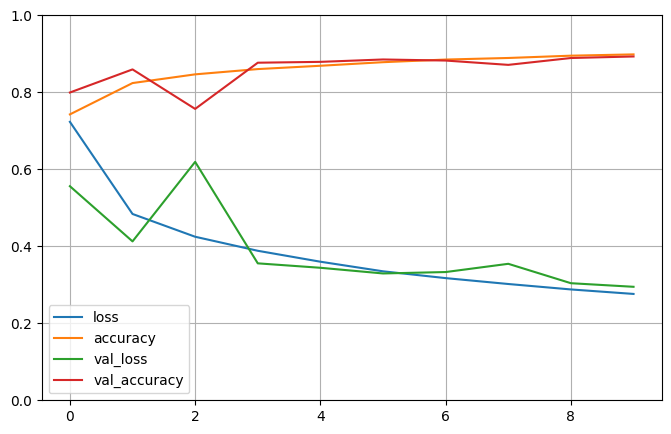

In [17]:
import pandas as pd
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [18]:
ev = model.evaluate(X_test_n, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.3134 - accuracy: 0.8827


In [19]:
ev

[0.3133699297904968, 0.8827000260353088]

In [20]:
X_new = X_test[:3]

In [22]:
y_pred = model.predict(X_new)
y_pred

1/1 [==============================] - 0s 134ms/step


array([[3.4331319e-05, 1.2793068e-06, 1.0844551e-05, 5.5640423e-05,
        1.8974893e-05, 3.3344021e-03, 1.8874169e-05, 2.1927696e-02,
        2.0344474e-03, 9.7256351e-01],
       [1.3941948e-05, 5.3934226e-09, 9.9961889e-01, 7.6066198e-07,
        7.9354817e-05, 2.0000268e-09, 2.8708702e-04, 2.3201854e-10,
        4.4320618e-08, 8.9871860e-10],
       [3.2184047e-07, 9.9998415e-01, 3.4215319e-08, 6.4225537e-06,
        8.8396737e-06, 2.4550526e-09, 1.8265067e-07, 2.6411460e-09,
        3.6488956e-09, 1.7972695e-08]], dtype=float32)

In [23]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

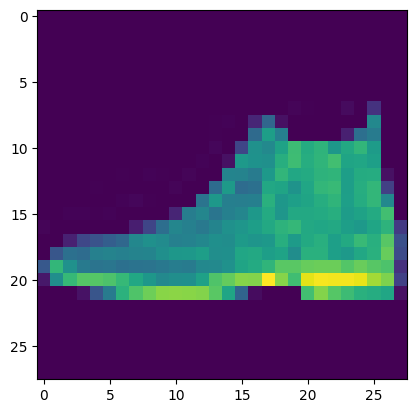

In [24]:
plt.imshow(X_new[0].reshape(28, 28))
plt.show()

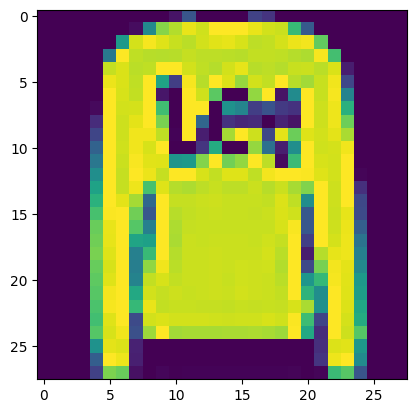

In [25]:
plt.imshow(X_new[1].reshape(28, 28))
plt.show()

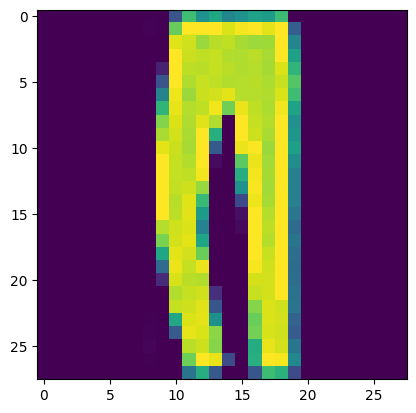

In [26]:
plt.imshow(X_new[2].reshape(28, 28))
plt.show()